## Import bibliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

### Przygotowanie danych

In [3]:
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")

In [4]:
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [5]:
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [6]:
(df1['EmployeeNumber'] == df2['EmployeeNumber']).value_counts()

True    4449
Name: EmployeeNumber, dtype: int64

In [7]:
df = pd.merge(df1, df2, how='left')

In [8]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [9]:
df = pd.concat([df1, df2],axis = 'columns')

In [10]:
df.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'EmployeeNumber',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome'],
      dtype='object')

In [11]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [13]:
df.isnull().any()

EmployeeNumber              False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
EmployeeNumber              False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [14]:
df.isnull().sum()

EmployeeNumber                0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [15]:
df.dropna(axis=0, inplace=True)

In [16]:
print('Age > 100: ', df.loc[df['Age']>100].shape[0])
print('TotalWorkingYears > 50: ', df.loc[df['TotalWorkingYears']>50].shape[0])
print('YearsInCurrentRole > 50: ', df.loc[df['YearsInCurrentRole']>50].shape[0])
print('YearsSinceLastPromotion > 50: ', df.loc[df['YearsSinceLastPromotion']>50].shape[0])
print('YearsWithCurrManager > 50: ', df.loc[df['YearsWithCurrManager']>50].shape[0])

Age > 100:  298
TotalWorkingYears > 50:  256
YearsInCurrentRole > 50:  300
YearsSinceLastPromotion > 50:  294
YearsWithCurrManager > 50:  268


In [17]:
df.shape

(4302, 37)

In [18]:
df = df.drop(df.loc[df['Age']>100].index)

In [19]:
df = df.drop(df.loc[df['TotalWorkingYears']>100].index)

In [20]:
df = df.drop(df.loc[df['YearsInCurrentRole']>100].index)

In [21]:
df = df.drop(df.loc[df['YearsSinceLastPromotion']>100].index)

In [22]:
df = df.drop(df.loc[df['YearsWithCurrManager']>100].index)

In [23]:
df = df.drop(df.loc[df['YearsAtCompany']>100].index)

In [24]:
print('DistanceFromHome > 500: ', df.loc[df['DistanceFromHome']>500].shape[0])
print('DistanceFromHome > 1000: ', df.loc[df['DistanceFromHome']>1000].shape[0])
print('DistanceFromHome > 5000: ', df.loc[df['DistanceFromHome']>5000].shape[0])
print('DistanceFromHome > 10000: ', df.loc[df['DistanceFromHome']>10000].shape[0])


DistanceFromHome > 500:  279
DistanceFromHome > 1000:  279
DistanceFromHome > 5000:  279
DistanceFromHome > 10000:  279


In [25]:
df = df.drop(df.loc[df['DistanceFromHome']>100].index)

In [26]:
df.shape

(2351, 37)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            2351 non-null   int64  
 1   Age                       2351 non-null   float64
 2   BusinessTravel            2351 non-null   object 
 3   DailyRate                 2351 non-null   float64
 4   Department                2351 non-null   object 
 5   DistanceFromHome          2351 non-null   float64
 6   Education                 2351 non-null   float64
 7   EducationField            2351 non-null   object 
 8   EmployeeCount             2351 non-null   float64
 9   EnvironmentSatisfaction   2351 non-null   float64
 10  Gender                    2351 non-null   object 
 11  HourlyRate                2351 non-null   float64
 12  JobInvolvement            2351 non-null   float64
 13  JobLevel                  2351 non-null   float64
 14  JobRole 

In [28]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes((['object'])).apply(lambda x: x.astype('category'))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2351 non-null   int64   
 1   Age                       2351 non-null   float64 
 2   BusinessTravel            2351 non-null   category
 3   DailyRate                 2351 non-null   float64 
 4   Department                2351 non-null   category
 5   DistanceFromHome          2351 non-null   float64 
 6   Education                 2351 non-null   float64 
 7   EducationField            2351 non-null   category
 8   EmployeeCount             2351 non-null   float64 
 9   EnvironmentSatisfaction   2351 non-null   float64 
 10  Gender                    2351 non-null   category
 11  HourlyRate                2351 non-null   float64 
 12  JobInvolvement            2351 non-null   float64 
 13  JobLevel                  2351 non-null   float6

In [30]:
df['EmployeeCount'].value_counts()

1.0    2351
Name: EmployeeCount, dtype: int64

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
EmployeeNumber,1.000000,0.011344,-0.009956,0.016606,0.018615,NaN,-0.007127,0.033511,0.012816,0.001683,...,NaN,-0.040273,0.004272,-0.024783,0.005028,0.003562,0.002210,-0.020329,0.012534,0.010571
Age,0.011344,1.000000,0.000192,-0.009573,0.211147,NaN,0.022676,-0.017854,0.014319,0.492563,...,NaN,0.038060,0.671053,-0.022125,-0.027601,0.334755,0.237282,0.241162,0.224941,0.474471
DailyRate,-0.009956,0.000192,1.000000,0.006468,-0.012812,NaN,0.013677,-0.003355,0.018091,0.014038,...,NaN,0.052625,0.016186,0.005445,-0.048188,-0.024219,0.028568,-0.020808,-0.009427,0.019898
DistanceFromHome,0.016606,-0.009573,0.006468,1.000000,0.013421,NaN,-0.020760,-0.031745,0.039389,-0.012708,...,NaN,0.046191,-0.006079,-0.043928,0.020528,-0.012992,0.013715,-0.003125,0.004557,-0.032923
Education,0.018615,0.211147,-0.012812,0.013421,1.000000,NaN,-0.024124,0.004516,0.044686,0.104036,...,NaN,0.033113,0.149050,-0.024190,-0.006064,0.093174,0.079340,0.063191,0.083043,0.097247
EnvironmentSatisfaction,-0.007127,0.022676,0.013677,-0.020760,-0.024124,NaN,1.000000,-0.063563,-0.003599,0.014412,...,NaN,0.009430,-0.000830,-0.026902,0.058140,0.019151,0.048693,0.017803,0.007016,0.001932
HourlyRate,0.033511,-0.017854,-0.003355,-0.031745,0.004516,NaN,-0.063563,1.000000,0.028631,-0.050334,...,NaN,0.050505,-0.051413,-0.001312,-0.013031,-0.044300,-0.042945,-0.054714,-0.020320,-0.026210
JobInvolvement,0.012816,0.014319,0.018091,0.039389,0.044686,NaN,-0.003599,0.028631,1.000000,-0.045553,...,NaN,0.018025,-0.021902,-0.040148,-0.041307,-0.024404,-0.011933,-0.025849,0.011499,-0.039892
JobLevel,0.001683,0.492563,0.014038,-0.012708,0.104036,NaN,0.014412,-0.050334,-0.045553,1.000000,...,NaN,0.023114,0.780111,-0.033518,0.012260,0.553321,0.399768,0.366382,0.404923,0.950093
JobSatisfaction,-0.005000,-0.003529,0.038783,-0.026666,-0.013543,NaN,-0.004543,-0.084241,0.011971,-0.015693,...,NaN,0.004503,-0.026377,0.005274,-0.021270,-0.023599,-0.033766,-0.066157,-0.054224,-0.018554


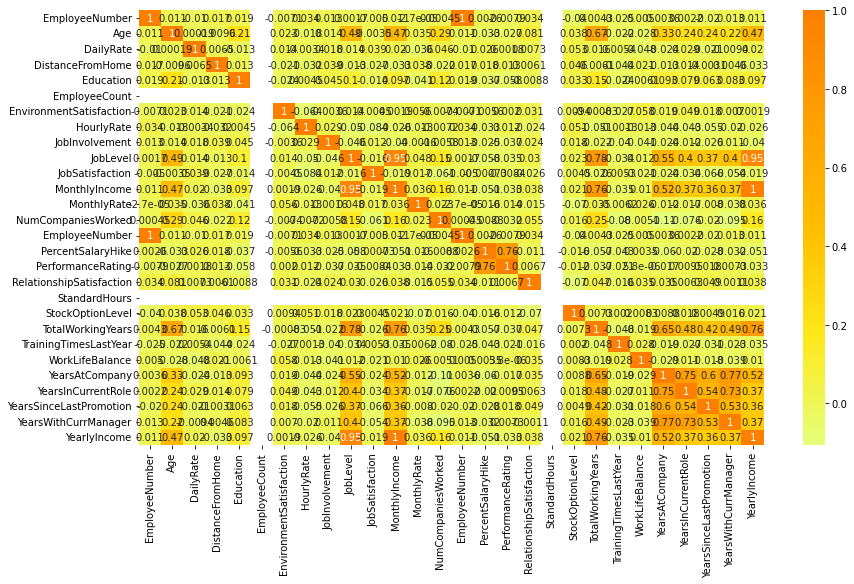

In [31]:
corr = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,cmap='Wistia', annot=True)

corr.loc[(corr > 0.7).any(axis=1)]

In [32]:
df = df.drop('Over18', axis=1)

In [33]:
df = df.drop('EmployeeNumber', axis=1)

In [34]:
df = df.drop('EmployeeCount', axis=1)

In [35]:
np.where(corr > 0.7)
list(zip(corr.columns[np.where(corr > 0.7)[0]], corr.columns[np.where(corr > 0.7)[1]]))

[('EmployeeNumber', 'EmployeeNumber'),
 ('EmployeeNumber', 'EmployeeNumber'),
 ('Age', 'Age'),
 ('DailyRate', 'DailyRate'),
 ('DistanceFromHome', 'DistanceFromHome'),
 ('Education', 'Education'),
 ('EnvironmentSatisfaction', 'EnvironmentSatisfaction'),
 ('HourlyRate', 'HourlyRate'),
 ('JobInvolvement', 'JobInvolvement'),
 ('JobLevel', 'JobLevel'),
 ('JobLevel', 'MonthlyIncome'),
 ('JobLevel', 'TotalWorkingYears'),
 ('JobLevel', 'YearlyIncome'),
 ('JobSatisfaction', 'JobSatisfaction'),
 ('MonthlyIncome', 'JobLevel'),
 ('MonthlyIncome', 'MonthlyIncome'),
 ('MonthlyIncome', 'TotalWorkingYears'),
 ('MonthlyIncome', 'YearlyIncome'),
 ('MonthlyRate', 'MonthlyRate'),
 ('NumCompaniesWorked', 'NumCompaniesWorked'),
 ('EmployeeNumber', 'EmployeeNumber'),
 ('EmployeeNumber', 'EmployeeNumber'),
 ('PercentSalaryHike', 'PercentSalaryHike'),
 ('PercentSalaryHike', 'PerformanceRating'),
 ('PerformanceRating', 'PercentSalaryHike'),
 ('PerformanceRating', 'PerformanceRating'),
 ('RelationshipSatisfactio

In [36]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan

In [37]:
np.where(corr > 0.7)
corr_list = list(zip(corr.columns[np.where(corr > 0.7)[0]], corr.columns[np.where(corr > 0.7)[1]]))
corr_list

[('MonthlyIncome', 'JobLevel'),
 ('EmployeeNumber', 'EmployeeNumber'),
 ('PerformanceRating', 'PercentSalaryHike'),
 ('TotalWorkingYears', 'JobLevel'),
 ('TotalWorkingYears', 'MonthlyIncome'),
 ('YearsInCurrentRole', 'YearsAtCompany'),
 ('YearsWithCurrManager', 'YearsAtCompany'),
 ('YearsWithCurrManager', 'YearsInCurrentRole'),
 ('YearlyIncome', 'JobLevel'),
 ('YearlyIncome', 'MonthlyIncome'),
 ('YearlyIncome', 'TotalWorkingYears')]

In [38]:
for i,j in corr_list:
    print(i)
    print(j)
    display((corr.loc[i,j]))

MonthlyIncome
JobLevel


0.9500925974632299

EmployeeNumber
EmployeeNumber


,EmployeeNumber,EmployeeNumber
EmployeeNumber,NaN,NaN
EmployeeNumber,1.0,NaN


PerformanceRating
PercentSalaryHike


0.7603299798477522

TotalWorkingYears
JobLevel


0.7801111596459153

TotalWorkingYears
MonthlyIncome


0.7631989417184456

YearsInCurrentRole
YearsAtCompany


0.7532356487612226

YearsWithCurrManager
YearsAtCompany


0.7707263895971832

YearsWithCurrManager
YearsInCurrentRole


0.7276961095227162

YearlyIncome
JobLevel


0.950092597463227

YearlyIncome
MonthlyIncome


1.0000000000000016

YearlyIncome
TotalWorkingYears


0.7631989417184477

In [39]:
df = df.drop('YearlyIncome', axis=1)

In [46]:
corr = X_test.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr_70 = corr.stack()[corr.stack().abs() > 0.7]

In [47]:
corr_70

MonthlyIncome                 JobLevel                             0.957152
PerformanceRating             PercentSalaryHike                    0.779741
TotalWorkingYears             Age                                  0.743098
                              JobLevel                             0.799930
                              MonthlyIncome                        0.780171
YearsInCurrentRole            YearsAtCompany                       0.729772
YearsWithCurrManager          YearsAtCompany                       0.765449
                              YearsInCurrentRole                   0.754015
BusinessTravel_Travel_Rarely  BusinessTravel_Travel_Frequently    -0.725233
Department_Sales              Department_Research & Development   -0.922151
JobRole_Sales Executive       Department_Research & Development   -0.753518
                              Department_Sales                     0.817130
dtype: float64

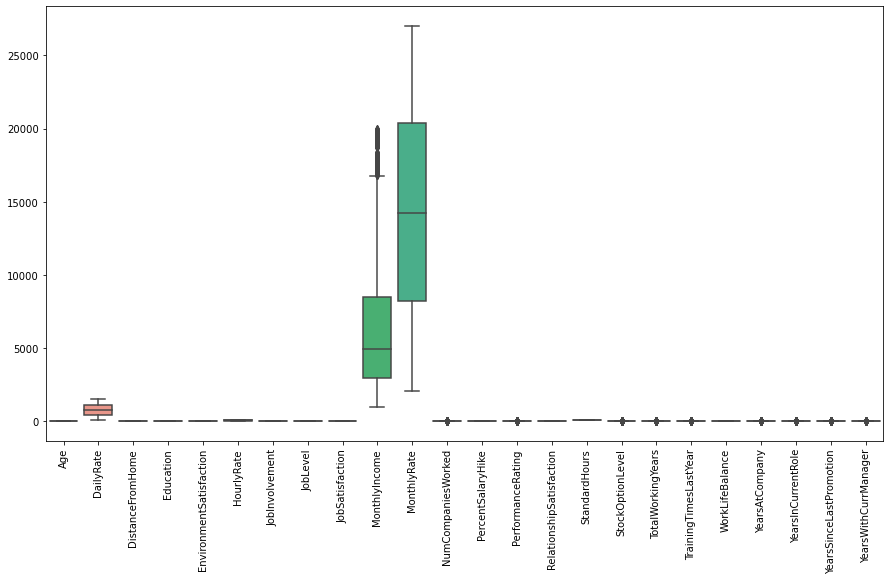

In [41]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df)

# plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       2351 non-null   float64 
 1   BusinessTravel            2351 non-null   category
 2   DailyRate                 2351 non-null   float64 
 3   Department                2351 non-null   category
 4   DistanceFromHome          2351 non-null   float64 
 5   Education                 2351 non-null   float64 
 6   EducationField            2351 non-null   category
 7   EnvironmentSatisfaction   2351 non-null   float64 
 8   Gender                    2351 non-null   category
 9   HourlyRate                2351 non-null   float64 
 10  JobInvolvement            2351 non-null   float64 
 11  JobLevel                  2351 non-null   float64 
 12  JobRole                   2351 non-null   category
 13  JobSatisfaction           2351 non-null   float6

In [43]:
df_dummies = pd.get_dummies(data=df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 
                               'MaritalStatus', 'OverTime', 'Attrition'], drop_first=True       
                           )

In [44]:
df_dummies.shape

(2351, 46)

Podział danych na zbiór treningowy i testowy:

In [45]:
X = df_dummies.drop('Attrition_Yes', axis=1)
y = df_dummies['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('test dimension= ', y_test.shape)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

X_train dimension=  (1880, 45)
X_test dimension=  (471, 45)
y_train dimension=  (1880,)
test dimension=  (471,)


Normalizacja danych:

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.preprocessing import QuantileTransformer

In [51]:
quantiler = QuantileTransformer(n_quantiles=100)
X_train_quant = quantiler.fit_transform(X_train)
X_test_quant = quantiler.transform(X_test)

Przygotowanie metryk

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
#     print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')
    

## KNN

### KNN - parametry standardowe - dane niewyskalowane

In [53]:
knn_classifier = KNeighborsClassifier()

parameters = {
    'n_neighbors': [5],
    'weights':['uniform'],
    'p': [2],
    'metric':['minkowski']
}

searcher = GridSearchCV(knn_classifier, parameters, scoring='roc_auc', n_jobs=-1)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV roc_auc", searcher.best_score_)

print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best CV roc_auc 0.5095141221326567
Test accuracy of best grid search hypers: 0.5275868652157313


### KNN - parametry niestandardowe - dane niewyskalowane

In [54]:
knn_classifier = KNeighborsClassifier()

parameters = {
    'n_neighbors': [11, 51, 71, 81, 111, 121, 135],
    'weights':['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5],
    'metric':['minkowski', 'chebyshev', 'manhattan']
}

searcher = GridSearchCV(knn_classifier, parameters, scoring='roc_auc', n_jobs=-1)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV roc_auc", searcher.best_score_)

print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'metric': 'minkowski', 'n_neighbors': 81, 'p': 3, 'weights': 'distance'}
Best CV roc_auc 0.5295490698238543
Test accuracy of best grid search hypers: 0.5253150057273769


### KNN - parametry niestandardowe - dane wyskalowane

In [55]:
knn_classifier = KNeighborsClassifier()

parameters = {
    'n_neighbors': [11, 51, 71, 81, 111, 121, 135],
    'weights':['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5],
    'metric':['minkowski', 'chebyshev', 'manhattan']
}

searcher = GridSearchCV(knn_classifier, parameters, scoring='roc_auc', n_jobs=-1)
searcher.fit(X_train_scaled, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV roc_auc", searcher.best_score_)

print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

Best CV params {'metric': 'minkowski', 'n_neighbors': 121, 'p': 1, 'weights': 'uniform'}
Best CV roc_auc 0.5740880324177737
Test accuracy of best grid search hypers: 0.5657216494845361


In [56]:
pd.DataFrame(searcher.cv_results_)[[
    'param_n_neighbors', 'param_p', 'param_weights', 'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values(by='mean_test_score', ascending=False)

,param_n_neighbors,param_p,param_weights,mean_test_score,std_test_score,rank_test_score
50,121,1,uniform,0.574088,0.010928,1
192,121,2,uniform,0.574088,0.010928,1
194,121,3,uniform,0.574088,0.010928,1
196,121,4,uniform,0.574088,0.010928,1
198,121,5,uniform,0.574088,0.010928,1
...,...,...,...,...,...,...
126,121,4,uniform,0.507659,0.013532,206
128,121,5,uniform,0.507659,0.013532,206
122,121,2,uniform,0.507659,0.013532,206
120,121,1,uniform,0.507659,0.013532,206


### KNN - parametry standardowe - quantiles

In [57]:
knn_classifier = KNeighborsClassifier()

parameters = {
    'n_neighbors': [5],
    'weights':['uniform'],
    'p': [2],
    'metric':['minkowski']
}

searcher = GridSearchCV(knn_classifier, parameters, scoring='roc_auc', n_jobs=-1)
searcher.fit(X_train_quant, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV roc_auc", searcher.best_score_)

print("Test accuracy of best grid search hypers:", searcher.score(X_test_quant, y_test))

Best CV params {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best CV roc_auc 0.523562837425984
Test accuracy of best grid search hypers: 0.528655975563192


## SVM

In [58]:
svm = SVC()

parameters = {'C':[1], 
              'gamma':['scale']
             }

searcher = GridSearchCV(svm, parameters,  n_jobs=-1)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 1, 'gamma': 'scale'}
Best CV accuracy 0.6148936170212767
Test accuracy of best grid search hypers: 0.6178343949044586


In [59]:
df['Attrition'].value_counts()

No     1447
Yes     904
Name: Attrition, dtype: int64

In [60]:
svm_final = SVC(C = 1, gamma = 'scale')
svm_final.fit(X_train, y_train)
y_pred = svm_final.predict(X_train)
print_results(calculate_metrics(y_train, y_pred), 'svm')

Results for svm
----
  Precision: 0.3074468085106383
  Recall:    0.5
  F1 score:  0.38076416337285907
  Mislabeled 724 out of 1880




E:\Programy\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
svm = SVC()

parameters = {'C':[0.01, 0.1, 1, 10, 100], 
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10, 15]     
             }

searcher = GridSearchCV(svm, parameters, n_jobs=-1)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 0.01, 'gamma': 0.0001}
Best CV accuracy 0.6148936170212767
Test accuracy of best grid search hypers: 0.6178343949044586


In [62]:
svm_final_2 = SVC(C = 0.01, gamma = 0.0001)
svm_final_2.fit(X_train, y_train)
y_pred = svm_final.predict(X_train)
print_results(calculate_metrics(y_train, y_pred), 'svm')

Results for svm
----
  Precision: 0.3074468085106383
  Recall:    0.5
  F1 score:  0.38076416337285907
  Mislabeled 724 out of 1880




E:\Programy\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM - dane wyskalowane

In [63]:
svm = SVC()

parameters = {'C':[0.01, 0.1, 1, 10, 100], 
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10, 15]     
             }

searcher = GridSearchCV(svm, parameters, n_jobs=-1)
searcher.fit(X_train_scaled, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

Best CV params {'C': 1, 'gamma': 0.01}
Best CV accuracy 0.6340425531914893
Test accuracy of best grid search hypers: 0.6390658174097664


### SVM - quantiles

In [64]:
svm = SVC()

parameters = {'C':[0.01, 0.1, 1, 10, 100], 
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10, 15]     
             }

searcher = GridSearchCV(svm, parameters, n_jobs=-1)
searcher.fit(X_train_quant, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_quant, y_test))

Best CV params {'C': 1, 'gamma': 0.1}
Best CV accuracy 0.6414893617021276
Test accuracy of best grid search hypers: 0.6475583864118896


## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object and run the search
parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth':[None, 1, 2, 3, 4, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5, 10],
    'min_samples_split': [2, 3, 4, 8, 10]
}

searcher = GridSearchCV(dt_clf, parameters, n_jobs=-1)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy 0.6196808510638299
Test accuracy of best grid search hypers: 0.6369426751592356


In [67]:
dt_clf = DecisionTreeClassifier()

# Instantiate the GridSearchCV object and run the search
parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth':[None, 1, 2, 3, 4, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5, 10],
    'min_samples_split': [2, 3, 4, 8, 10]
}

searcher = GridSearchCV(dt_clf, parameters, n_jobs=-1)
searcher.fit(X_train_quant, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_quant, y_test))

Best CV params {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy 0.6196808510638299
Test accuracy of best grid search hypers: 0.6369426751592356


### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_clf = RandomForestClassifier(n_jobs=-1)

# Instantiate the GridSearchCV object and run the search
parameters = {
    'n_estimators': [1, 2, 5, 8, 10, 12, 15, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]
}

searcher = GridSearchCV(rf_clf, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 15}
Best CV accuracy 0.6377659574468085
Test accuracy of best grid search hypers: 0.6305732484076433


### Usunięcie kolejnych skorelowanych danych objaśniających

In [73]:
X1 = df_dummies.drop(['Attrition_Yes', 'MonthlyIncome', 'YearsAtCompany', 'Department_Sales', 
                     'Department_Research & Development','JobRole_Sales Executive', 'YearsWithCurrManager'], axis=1)
y1 = df_dummies['Attrition_Yes']
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size = 0.2, random_state=42)
print('X_train dimension= ', X1_train.shape)
print('X_test dimension= ', X1_test.shape)
print('y_train dimension= ', y1_train.shape)
print('test dimension= ', y1_test.shape)

X1_train.reset_index(inplace=True, drop=True)
X1_test.reset_index(inplace=True, drop=True)
y1_train.reset_index(inplace=True, drop=True)
y1_test.reset_index(inplace=True, drop=True)

X_train dimension=  (1880, 45)
X_test dimension=  (471, 45)
y_train dimension=  (1880,)
test dimension=  (471,)


In [74]:
knn_classifier = KNeighborsClassifier()

parameters = {
    'n_neighbors': [5],
    'weights':['uniform'],
    'p': [2],
    'metric':['minkowski']
}

searcher = GridSearchCV(knn_classifier, parameters, scoring='roc_auc', n_jobs=-1)
searcher.fit(X1_train, y1_train)

print("Best CV params", searcher.best_params_)
print("Best CV roc_auc", searcher.best_score_)

print("Test accuracy of best grid search hypers:", searcher.score(X1_test, y1_test))

E:\Programy\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best CV params {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best CV roc_auc 0.5095141221326567
Test accuracy of best grid search hypers: 0.5275868652157313


In [75]:
dt_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object and run the search
parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth':[None, 1, 2, 3, 4, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5, 10],
    'min_samples_split': [2, 3, 4, 8, 10]
}

searcher = GridSearchCV(dt_clf, parameters, n_jobs=-1)
searcher.fit(X1_train, y1_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X1_test, y1_test))

Best CV params {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy 0.6196808510638299
Test accuracy of best grid search hypers: 0.6369426751592356
